In [1]:
import numpy as np
import tensorflow as tf
import random
from tensorflow import keras
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer 
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageChops, ImageOps
from sklearn.model_selection import train_test_split

In [2]:
img_size_x = 50
img_size_y = 50

In [3]:
def get_img(path):
    test_img = Image.open(path)
#     test_img = test_img.convert('L')
    test_img = test_img.resize((img_size_x, img_size_y)) 
    test_x = np.array(test_img, np.float32)
    test_x = test_x / 255.0
    return test_x

In [4]:
path = 'D:/Лабы 3 курс/МНСиРО/Lab4/data'
folder_list = ['matchstick', 'pencil', 'other']

In [5]:
# считывание данных
x_full = []
y_full = []
for folder in folder_list:
    file_list = os.listdir(path + '/' + folder)
    for file in file_list:
        x_full.append(get_img(path + '/' + folder + '/' + file))
        if folder == 'matchstick':
            y_full.append(0)
        elif folder == 'pencil':
            y_full.append(1)
        else:
            y_full.append(2)
            
print(x_full[0])

[[[0.5921569  0.65882355 0.76862746]
  [0.59607846 0.6627451  0.7764706 ]
  [0.6        0.6666667  0.78039217]
  ...
  [0.627451   0.67058825 0.7882353 ]
  [0.61960787 0.6627451  0.78039217]
  [0.6156863  0.65882355 0.7764706 ]]

 [[0.6039216  0.6666667  0.7764706 ]
  [0.60784316 0.67058825 0.78431374]
  [0.60784316 0.6745098  0.78431374]
  ...
  [0.6313726  0.6745098  0.7921569 ]
  [0.62352943 0.6666667  0.78431374]
  [0.62352943 0.6666667  0.78431374]]

 [[0.6039216  0.6745098  0.76862746]
  [0.60784316 0.6745098  0.78039217]
  [0.60784316 0.6745098  0.78431374]
  ...
  [0.6313726  0.6745098  0.7921569 ]
  [0.62352943 0.6666667  0.78431374]
  [0.62352943 0.6666667  0.78431374]]

 ...

 [[0.68235296 0.5686275  0.30588236]
  [0.627451   0.45490196 0.23137255]
  [0.7529412  0.627451   0.41960785]
  ...
  [0.7647059  0.59607846 0.34509805]
  [0.72156864 0.5686275  0.2784314 ]
  [0.37254903 0.21568628 0.04313726]]

 [[0.6117647  0.47058824 0.23921569]
  [0.53333336 0.38431373 0.19607843]


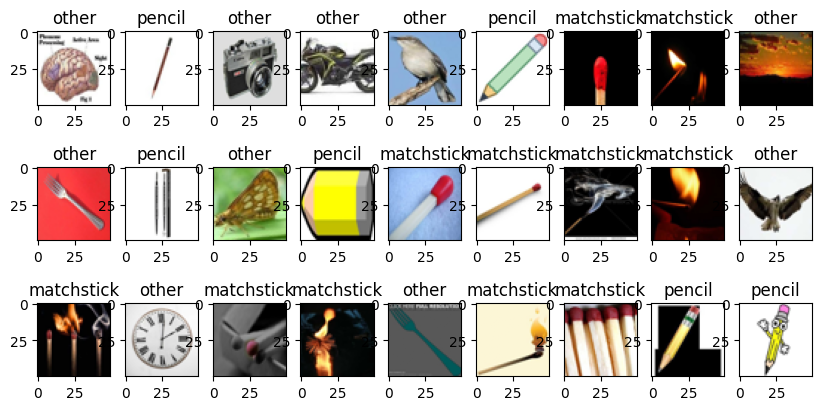

In [6]:
plt.figure(figsize=(10,5))
for i in range(27):
    plt.subplot(3,9,i + 1)
    item = random.randint(0, len(x_full) - 1)
    plt.imshow(x_full[item])
    plt.title(['matchstick', 'pencil', 'other'][y_full[item]])

In [7]:
x_full = np.array(x_full, np.float32)
y_full = np.array(y_full, np.float32)

In [8]:
n_classes = 3
y_full_cat = keras.utils.to_categorical(y_full, n_classes)
print(y_full_cat[:10])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [9]:
n_classes = 3
num_featres = img_size_x * img_size_y

n_hidden_1 = 1500
n_hidden_2 = 100
n_hidden_3 = 50

In [10]:
(x_train, x_test, y_train, y_test) = train_test_split(x_full, 
                                                      y_full_cat, test_size=0.2, random_state=42)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(747, 50, 50, 3)
(187, 50, 50, 3)
(747, 3)
(187, 3)


In [12]:
model = Sequential([
    Conv2D(128, (7, 7), padding = 'same', activation = 'relu', input_shape = (img_size_x, img_size_y, 3)),
    MaxPooling2D((3, 3), strides = 2),
    Conv2D(256, (5, 5), padding = 'same', activation = 'relu'),
    MaxPooling2D((3, 3), strides = 2),
    Conv2D(384, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D((3, 3), strides = 2),
    Conv2D(256, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D((3, 3), strides = 2),
    Flatten(),
    Dense(384, activation = 'sigmoid'),
    Dense(n_classes, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 128)       18944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       819456    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 384)       885120    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 384)        0

In [13]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001)
model.compile(loss='MSE', optimizer=optimizer, metrics = ['accuracy'])
print(y_train.shape)

(747, 3)


In [14]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
5/5 [==============================] - 30s 6s/step - loss: 0.2219 - accuracy: 0.4338 - val_loss: 0.2414 - val_accuracy: 0.3867
Epoch 2/50
5/5 [==============================] - 28s 6s/step - loss: 0.2130 - accuracy: 0.4673 - val_loss: 0.2149 - val_accuracy: 0.5067
Epoch 3/50
5/5 [==============================] - 27s 5s/step - loss: 0.2054 - accuracy: 0.4891 - val_loss: 0.2187 - val_accuracy: 0.3867
Epoch 4/50
5/5 [==============================] - 28s 6s/step - loss: 0.1964 - accuracy: 0.4891 - val_loss: 0.1809 - val_accuracy: 0.5533
Epoch 5/50
5/5 [==============================] - 31s 6s/step - loss: 0.1729 - accuracy: 0.6147 - val_loss: 0.1568 - val_accuracy: 0.6467
Epoch 6/50
5/5 [==============================] - 29s 6s/step - loss: 0.1589 - accuracy: 0.6566 - val_loss: 0.1584 - val_accuracy: 0.6200
Epoch 7/50
5/5 [==============================] - 28s 5s/step - loss: 0.1553 - accuracy: 0.6449 - val_loss: 0.1615 - val_accuracy: 0.6467
Epoch 8/50
5/5 [==================

In [15]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 2s 352ms/step - loss: 0.1421 - accuracy: 0.7380


[0.14213137328624725, 0.7379679083824158]

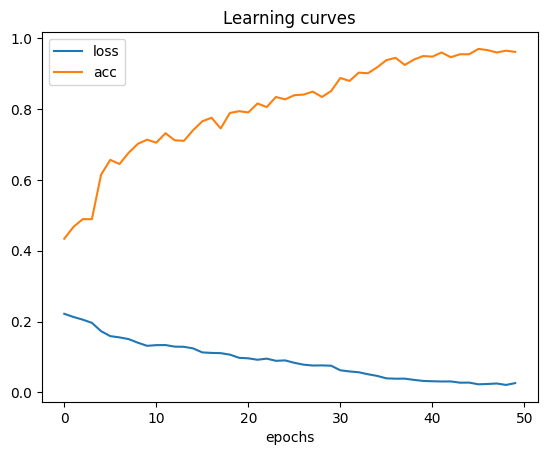

In [20]:
plt.title('Learning curves')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['accuracy'], label = 'acc')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [18]:
test_imgs = x_test[:30]
preds = model.predict(test_imgs)
print(preds)

1/1 [==============================] - 0s 412ms/step
[[6.17756918e-02 9.09342885e-01 2.88814511e-02]
 [4.54162866e-01 2.55856756e-02 5.20251513e-01]
 [9.99254167e-01 7.21176155e-04 2.46043037e-05]
 [3.43279056e-02 3.56629287e-04 9.65315461e-01]
 [2.48988509e-01 9.54733230e-03 7.41464138e-01]
 [8.74501705e-01 5.37575921e-04 1.24960698e-01]
 [1.95528817e-04 1.04756642e-03 9.98756886e-01]
 [3.29401600e-03 1.39466829e-06 9.96704638e-01]
 [2.80494220e-04 3.18864136e-06 9.99716341e-01]
 [2.00682804e-02 8.77533913e-01 1.02397807e-01]
 [1.18876109e-04 2.46207662e-07 9.99880910e-01]
 [5.97762354e-02 9.53485668e-02 8.44875216e-01]
 [9.21652839e-03 2.06652490e-04 9.90576863e-01]
 [6.61065519e-01 9.42871198e-02 2.44647339e-01]
 [5.70948839e-01 4.81670504e-05 4.29002881e-01]
 [7.53627392e-04 2.82877227e-05 9.99218106e-01]
 [3.49782050e-01 5.30878305e-01 1.19339682e-01]
 [4.78401314e-04 4.13619273e-06 9.99517441e-01]
 [3.27133667e-03 3.21973488e-03 9.93508935e-01]
 [9.95202422e-01 4.79129981e-03 6.2

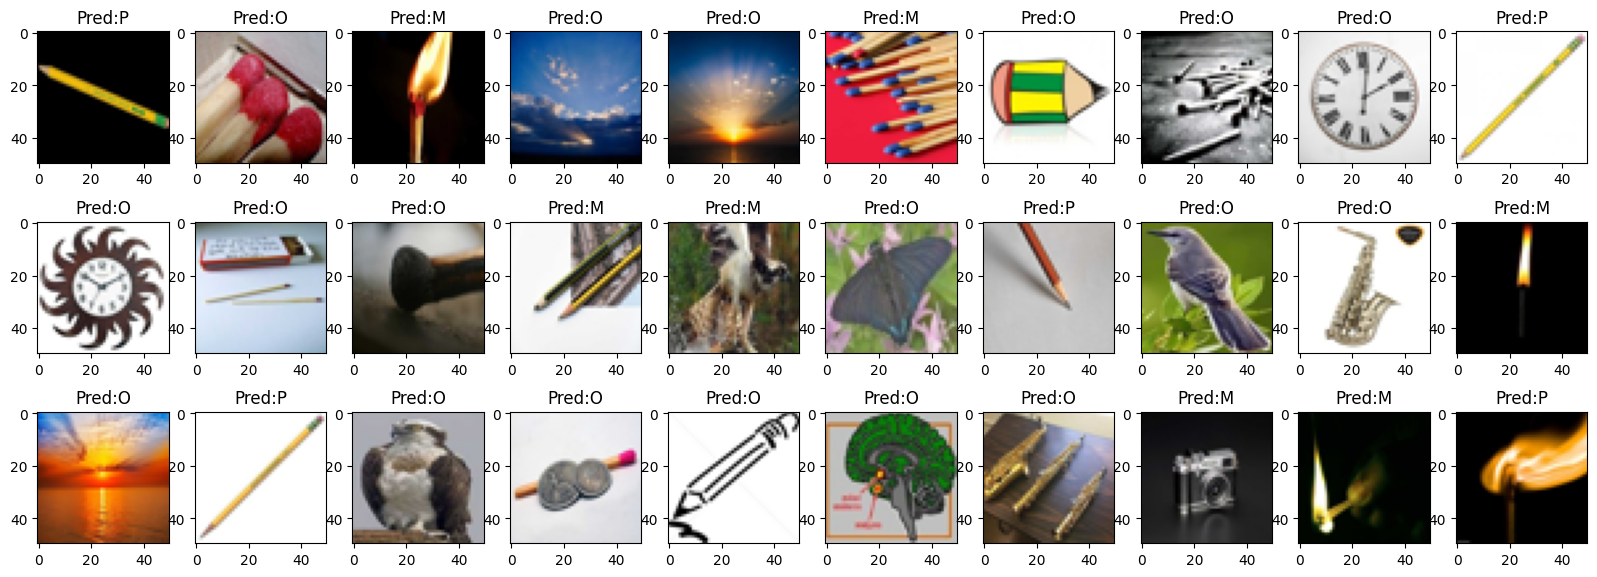

In [19]:
plt.figure(figsize=(20,7))
for i in range(len(test_imgs)):
    plt.subplot(3,10,i + 1)
    plt.imshow(test_imgs[i])
    plt.title(['Pred:M', 'Pred:P', 'Pred:O'][np.argmax(preds[i])])